# 패키지 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings(action='ignore')
%matplotlib inline

# 데이터 이해하기

### 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

## 칼럼 설명

- feature
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
 - Months_on_book : Period of relationship with bank
 - Total_Relationship_Count : Total no. of products held by the customer
 - Months_Inactive_12_mon : No. of months inactive in the last 12 months
 - Contacts_Count_12_mon : No. of Contacts in the last 12 months
 - Credit_Limit : Credit Limit on the Credit Card
 - Total_Revolving_Bal : Total Revolving Balance on the Credit Card
 - Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)
 - Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)
 - Total_Trans_Amt : Total Transaction Amount (Last 12 months)
 - Total_Trans_Ct : Total Transaction Count (Last 12 months)
 - Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)
 - Avg_Utilization_Ratio : Average Card Utilization Ratio

- target
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1
1. 은행 카드 서비스 담당자의 입장

2. 카드 서비스를 이용하는 고객의 입장

위 두 가지를 생각하면서 데이터를 분석하는 것은 어떨까요??

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 평가방식

평가방식은 Logloss이기 때문에 predict_proba을 통해서 각 클래스의 예측 확률을 구하는 방식으로 에측을 해야합니다!

## 대회 주소
https://www.kaggle.com/t/cd058141be084c4f81c9df010c587ae4

In [7]:
# 데이터의 경로 각자에 맞추어서 변경해주세요
data_dir = '/content/drive/MyDrive/tobigs/week4_Ensemble_Assignment/'

train = pd.read_csv(data_dir + 'train.csv')
test = pd.read_csv(data_dir + 'test.csv')
submission = pd.read_csv(data_dir + 'sample_submission.csv')

In [8]:
train.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,F,1,Unknown,Divorced,Unknown,Blue,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,M,3,Uneducated,Single,$60K - $80K,Blue,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,M,0,Uneducated,Divorced,$80K - $120K,Blue,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,F,1,Graduate,Single,$40K - $60K,Blue,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,F,0,Uneducated,Married,Less than $40K,Blue,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0


In [9]:
test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,53,F,2,College,Single,Less than $40K,Blue,45,6,3,3,6210.0,1083,5127.0,0.621,3095,62,0.590,0.174
1,52,M,1,College,Married,$80K - $120K,Blue,48,4,3,3,2066.0,1601,465.0,0.742,1578,41,0.414,0.775
2,27,M,0,Unknown,Married,$40K - $60K,Blue,14,4,1,4,3823.0,2130,1693.0,0.371,2026,49,0.441,0.557
3,43,M,3,Unknown,Single,$60K - $80K,Blue,34,6,2,0,13771.0,2517,11254.0,0.501,1510,42,0.750,0.183
4,55,F,2,High School,Married,$40K - $60K,Blue,42,2,2,3,5431.0,2007,3424.0,0.661,4569,82,0.608,0.370


In [10]:
submission.head()

,id,Existing Customer,Attrited Customer
0,0,0,1
1,1,0,1
2,2,0,1
3,3,0,1
4,4,0,1


# 데이터 전처리


In [11]:
train.shape

(8101, 20)

In [12]:
test.shape

(2026, 19)

In [13]:
train.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
dtype: int64

In [14]:
test.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

데이터에 결측치는 존재하지 않는 것으로 보입니다.

하지만 진짜 결측치가 존재하지 않을까요?

결측치가 다른 이름으로 기록되어 있을 수도 있고 0으로 기록되어 있을 수도 있습니다.

이 부분은 한번 EDA를 통해서 확인해보세요!

# EDA

정형데이터의 경우 feature engineering 이 모델의 성능에 정말 큰 영향을 주기 때문에 EDA를 통해서 얻은 인사이트를 바탕으로 최고의 feature를 만들어보세요! 

### Target : Attrition_Flag

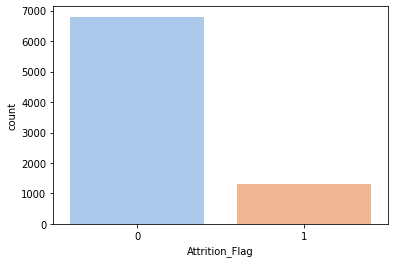

In [15]:
sns.countplot(train['Attrition_Flag'], palette = 'pastel')

In [16]:
def show_basic_eda(name):
    f, ax = plt.subplots(1, 2, figsize=(18, 8))
    train[name].value_counts().plot(kind='pie',
                                          autopct='%1.1f%%',
                                          ax = ax[0],
                                          shadow=True
                                         )
    sns.countplot(name, data=train, ax=ax[1], hue ='Attrition_Flag')
    ax[1].set_title(name+'_Attrition')


    g =train.groupby(name)['Attrition_Flag'].value_counts(normalize=True).unstack().plot(kind="bar", 
                                                                                  legend=True , 
                                                                                  stacked= True ,
                                                                                  )
    g.set_title(name+'_Attrition_ratio')

    plt.show()

    print(pd.crosstab(train[name],train['Attrition_Flag']))

### Customer_Age

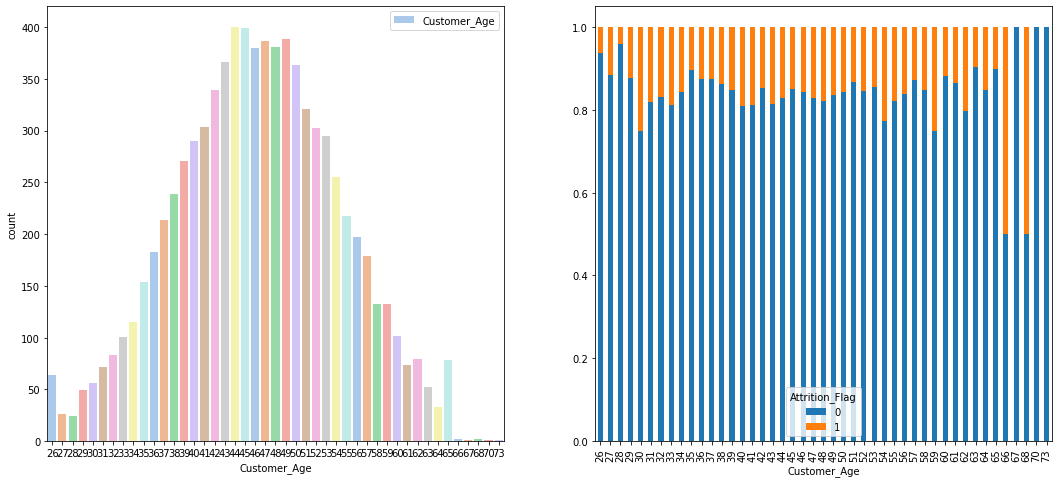

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

g = sns.countplot(train['Customer_Age'], palette = 'pastel', label = 'Customer_Age', ax = ax[0])
g.legend()

train.groupby("Customer_Age")['Attrition_Flag'].value_counts(normalize=True).unstack().plot(kind="bar", 
                                                                              legend=True , 
                                                                              stacked= True ,
                                                                            ax = ax[1]
                                                                              )

plt.show()

### Gender

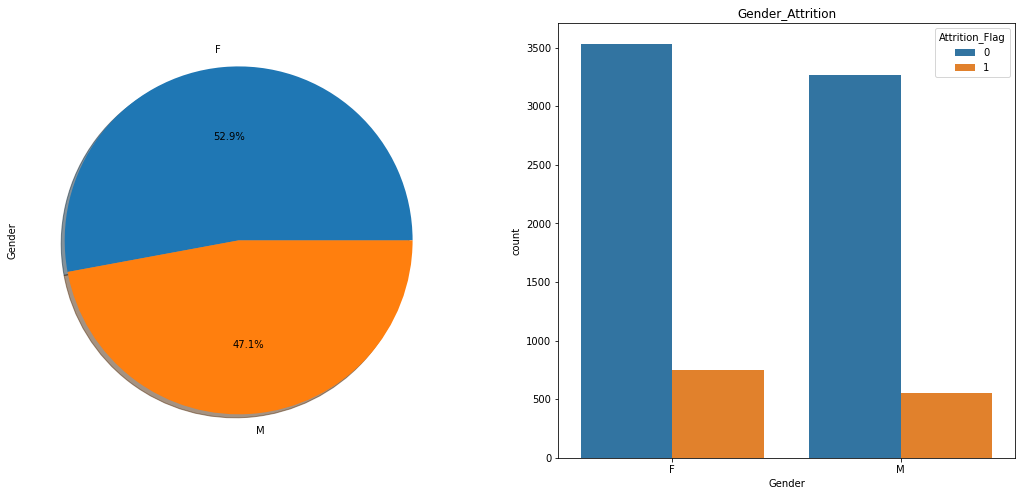

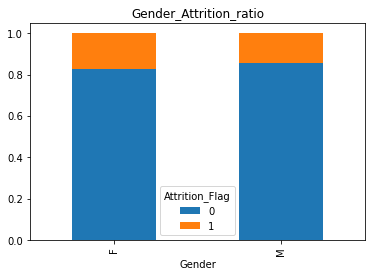

Attrition_Flag     0    1
Gender                   
F               3534  752
M               3265  550


In [18]:
show_basic_eda("Gender")

### Dependent_count

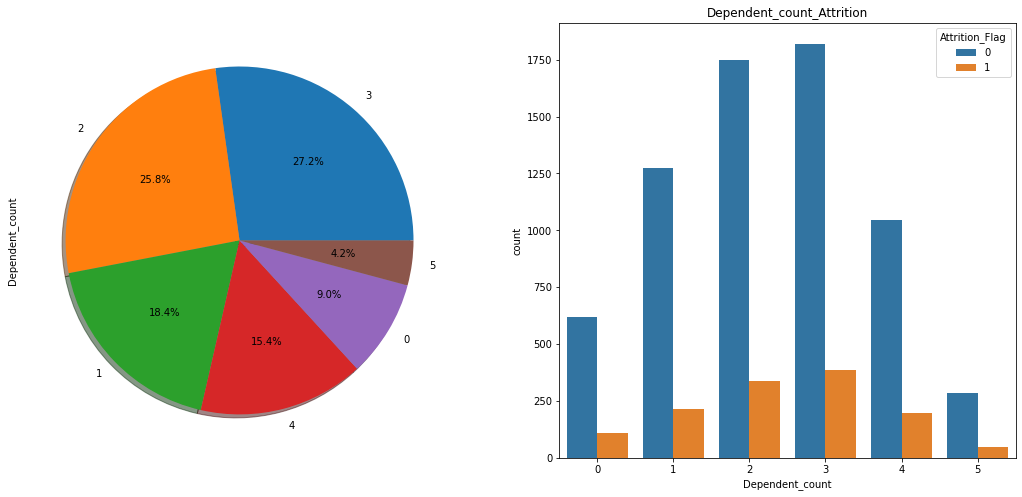

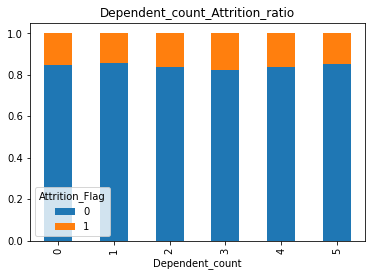

Attrition_Flag      0    1
Dependent_count           
0                 621  111
1                1275  216
2                1749  340
3                1820  386
4                1047  199
5                 287   50


In [19]:
show_basic_eda('Dependent_count')

### Education_Level

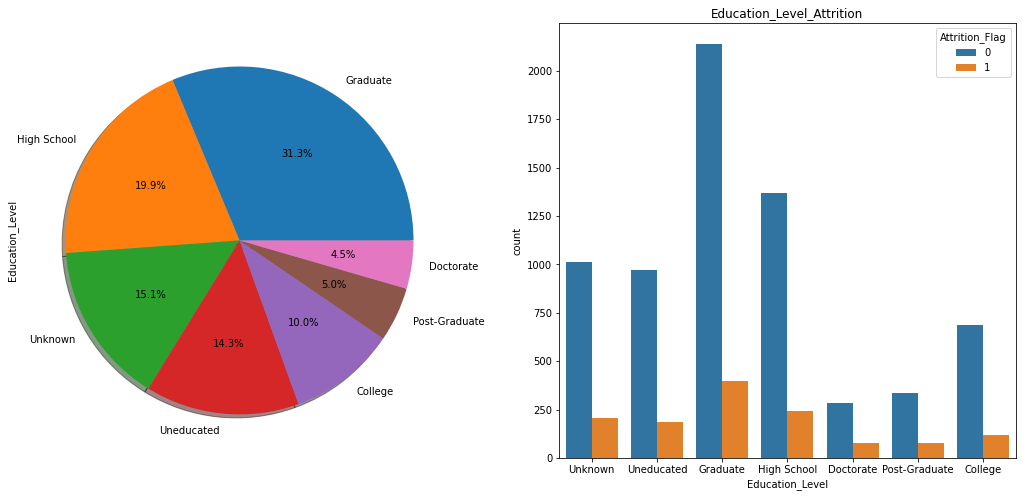

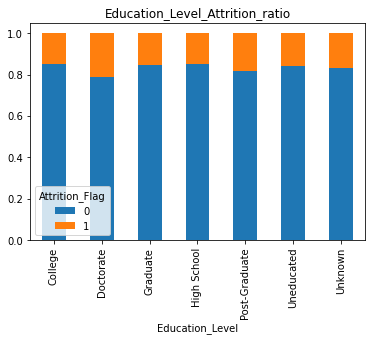

Attrition_Flag      0    1
Education_Level           
College           687  120
Doctorate         286   77
Graduate         2140  395
High School      1368  241
Post-Graduate     334   75
Uneducated        972  186
Unknown          1012  208


In [20]:
show_basic_eda("Education_Level")

### Marital_Status

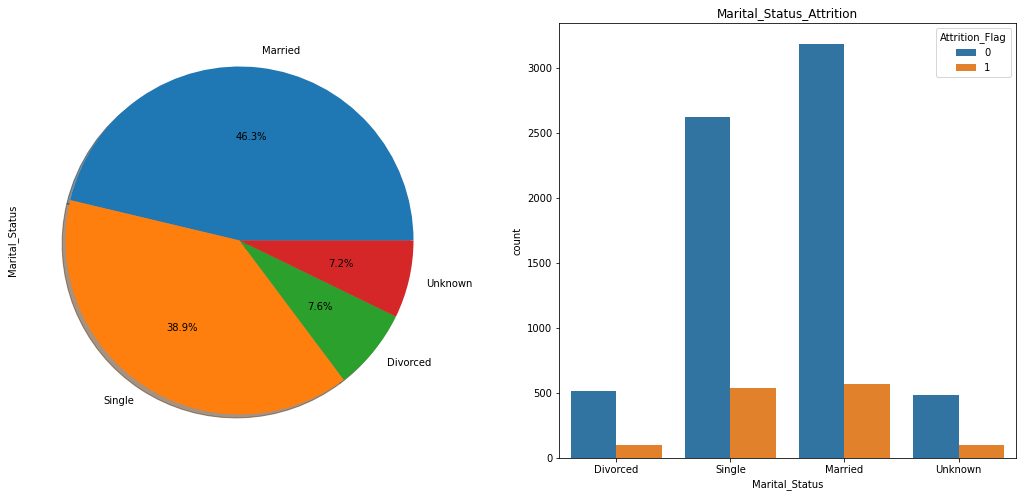

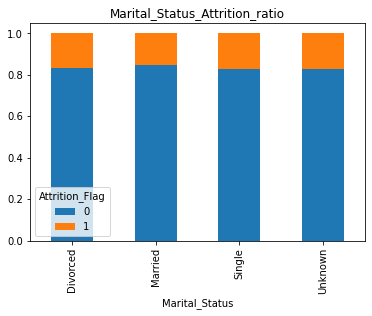

Attrition_Flag     0    1
Marital_Status           
Divorced         511  102
Married         3184  565
Single          2619  536
Unknown          485   99


In [21]:
show_basic_eda('Marital_Status')

### Income_Category

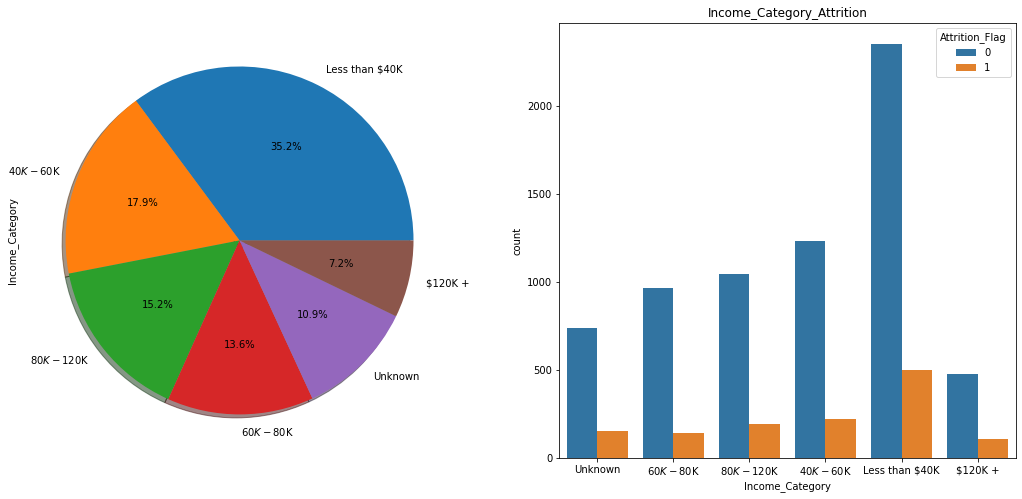

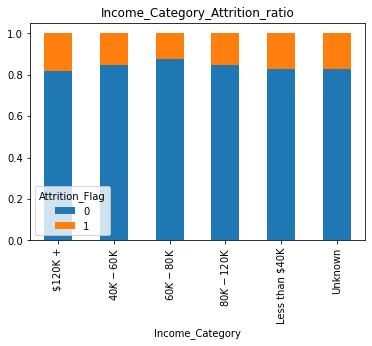

Attrition_Flag      0    1
Income_Category           
$120K +           476  105
$40K - $60K      1231  219
$60K - $80K       962  139
$80K - $120K     1043  191
Less than $40K   2351  497
Unknown           736  151


In [22]:
show_basic_eda('Income_Category')

### Card_Category

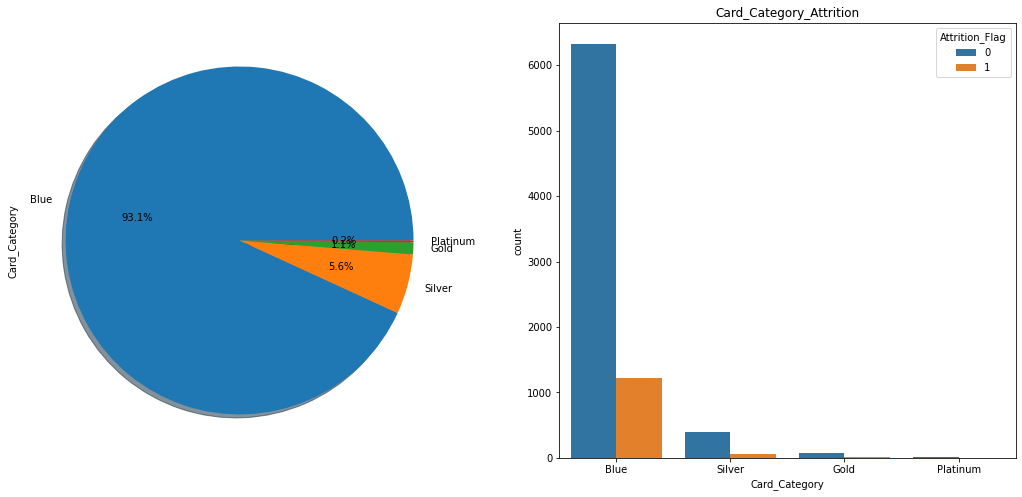

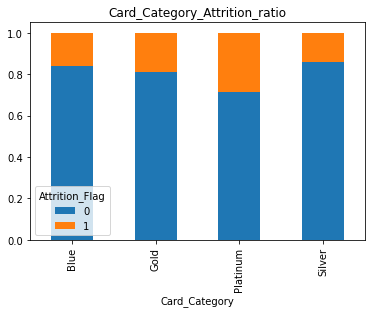

Attrition_Flag     0     1
Card_Category             
Blue            6328  1218
Gold              73    17
Platinum          10     4
Silver           388    63


In [23]:
show_basic_eda('Card_Category')

### Months_on_book

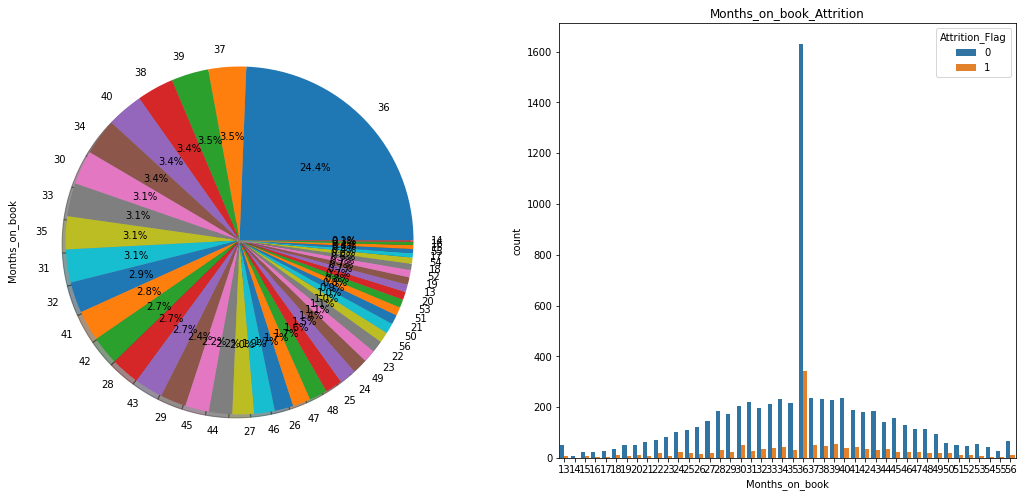

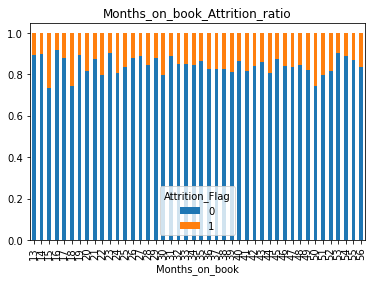

Attrition_Flag     0    1
Months_on_book           
13                50    6
14                 9    1
15                22    8
16                22    2
17                29    4
18                35   12
19                50    6
20                49   11
21                62    9
22                70   18
23                84    9
24               101   24
25               108   21
26               123   17
27               145   18
28               183   33
29               171   23
30               203   52
31               220   28
32               197   35
33               213   37
34               231   42
35               215   33
36              1631  344
37               235   50
38               230   48
39               227   53
40               237   37
41               187   42
42               182   34
43               185   30
44               141   34
45               157   22
46               130   25
47               113   22
48               114   21
49          

In [24]:
show_basic_eda('Months_on_book')

### Total_Relationship_Count

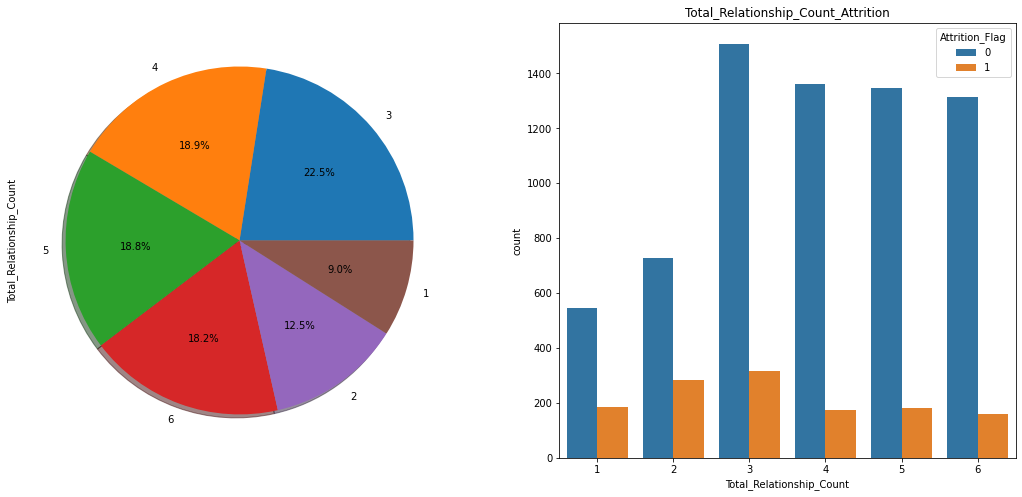

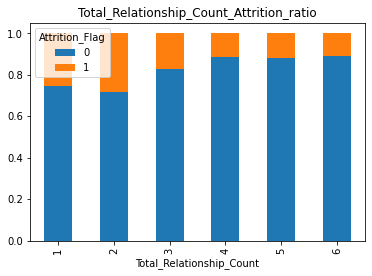

Attrition_Flag               0    1
Total_Relationship_Count           
1                          544  184
2                          726  285
3                         1508  317
4                         1362  173
5                         1345  182
6                         1314  161


In [25]:
show_basic_eda('Total_Relationship_Count')

### Months_Inactive_12_mon

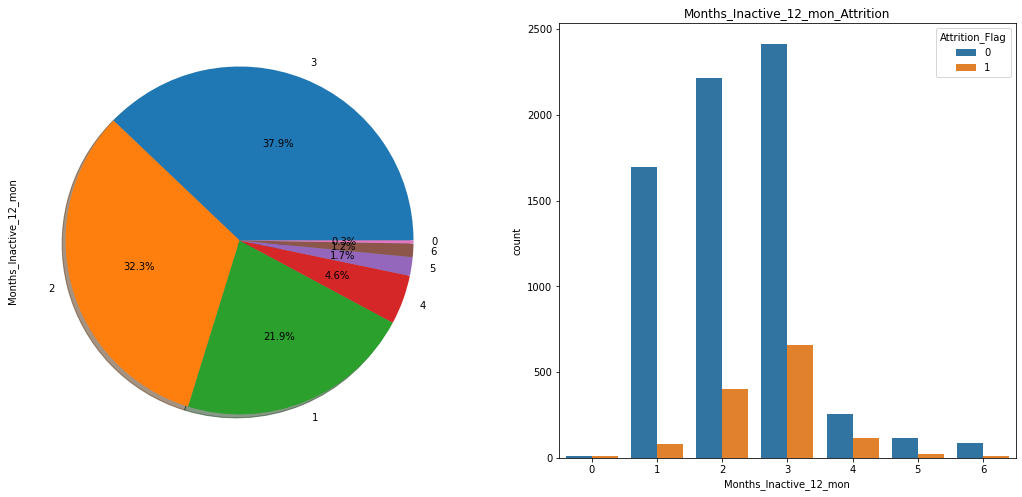

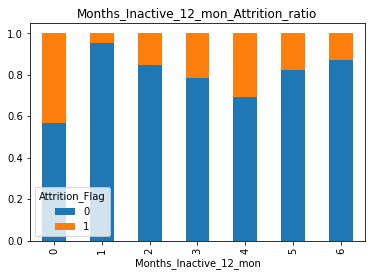

Attrition_Flag             0    1
Months_Inactive_12_mon           
0                         13   10
1                       1695   82
2                       2217  402
3                       2414  656
4                        257  114
5                        115   25
6                         88   13


In [26]:
show_basic_eda("Months_Inactive_12_mon")

### Contacts_Count_12_mon

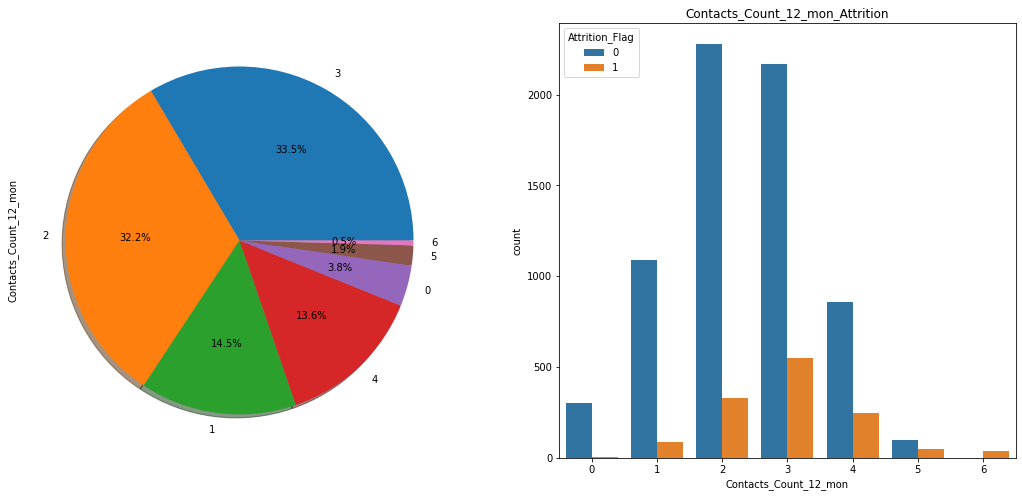

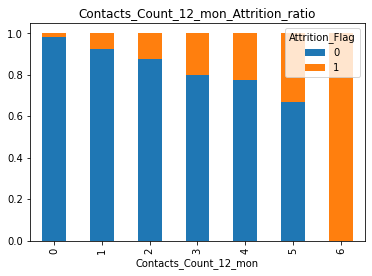

Attrition_Flag            0    1
Contacts_Count_12_mon           
0                       302    5
1                      1092   86
2                      2280  328
3                      2167  548
4                       857  248
5                       101   50
6                         0   37


In [27]:
show_basic_eda("Contacts_Count_12_mon")

### Credit_Limit

In [28]:
fig = px.box(train, color="Attrition_Flag", y="Credit_Limit", points="all",title='Credit limit on the credit card')
fig.show()

### Total_Revolving_Bal

In [29]:
fig = px.box(train, color="Attrition_Flag", y="Total_Revolving_Bal", points="all",title='Total_Revolving_Bal on the credit card')
fig.show()

### Avg_Open_To_Buy

In [30]:
fig = px.box(train, color="Attrition_Flag", y="Avg_Open_To_Buy", points="all",title='Avg_Open_To_Buy limit on the credit card')
fig.show()

### Total_Amt_Chng_Q4_Q1

In [31]:
fig = px.box(train, color="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", points="all",title='Total_Amt_Chng_Q4_Q1 on the credit card')
fig.show()

### Total_Trans_Amt

In [32]:
fig = px.box(train, color="Attrition_Flag", y="Total_Trans_Amt", points="all",title='Total_Trans_Amt on the credit card')
fig.show()

### Total_Trans_Ct

In [33]:
fig = px.box(train, color="Attrition_Flag", y="Total_Trans_Ct", points="all",title='Total_Trans_Ct on the credit card')
fig.show()


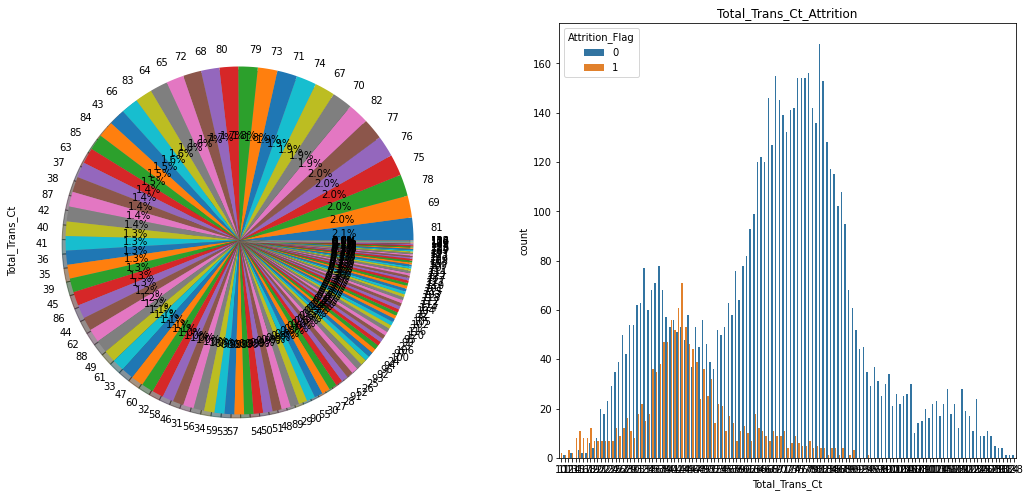

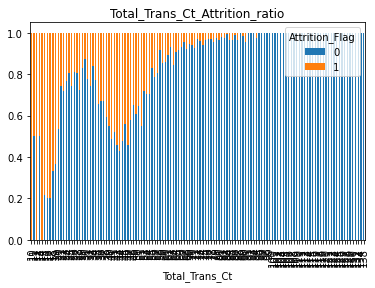

Attrition_Flag  0  1
Total_Trans_Ct      
10              0  2
11              1  1
12              0  3
13              2  2
14              0  8
...            .. ..
130             4  0
131             4  0
132             1  0
134             1  0
138             1  0

[125 rows x 2 columns]


In [34]:
show_basic_eda("Total_Trans_Ct")

### Total_Ct_Chng_Q4_Q

In [35]:
fig = px.box(train, color="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", points="all",title='Total_Ct_Chng_Q4_Q1 on the credit card')
fig.show()


### Avg_Utilization_Ratio

In [36]:
fig = px.box(train, color="Attrition_Flag", y="Avg_Utilization_Ratio", points="all",title='Avg_Utilization_Ratio on the credit card')
fig.show()



# Model

In [37]:
train

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,F,1,Unknown,Divorced,Unknown,Blue,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,M,3,Uneducated,Single,$60K - $80K,Blue,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,M,0,Uneducated,Divorced,$80K - $120K,Blue,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,F,1,Graduate,Single,$40K - $60K,Blue,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,F,0,Uneducated,Married,Less than $40K,Blue,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,46,F,3,Graduate,Divorced,Less than $40K,Blue,36,3,2,2,2391.0,1625,766.0,0.662,7649,101,0.603,0.680,0
8097,37,M,3,Uneducated,Married,$40K - $60K,Blue,25,5,0,3,1438.3,0,1438.3,1.023,5046,77,0.925,0.000,0
8098,50,F,1,Graduate,Married,Less than $40K,Blue,36,4,2,3,1438.3,0,1438.3,0.851,4765,71,1.088,0.000,0
8099,55,F,2,High School,Married,Less than $40K,Blue,45,5,2,0,3187.0,2517,670.0,1.144,1627,38,0.652,0.790,0


In [38]:
categorical_columns = train.columns[train.dtypes =='object']


In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [40]:
temp_train = train[categorical_columns]
temp_test = test[categorical_columns]


In [41]:
for col in categorical_columns:
    encoder.fit(temp_train[col])
    train[col] = encoder.transform(temp_train[col])
    test[col] = encoder.transform(temp_test[col])   

In [42]:
train

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,44,0,1,6,0,5,0,36,3,2,1,17116.0,1289,15827.0,0.559,3632,50,0.923,0.075,0
1,42,1,3,5,2,2,0,30,4,2,3,8302.0,1294,7008.0,0.558,3221,66,0.610,0.156,0
2,57,1,0,5,0,3,0,39,4,4,3,2795.0,1832,963.0,0.839,4679,67,0.861,0.655,0
3,26,0,1,2,2,1,0,20,6,3,3,1438.3,673,765.3,0.595,2167,48,0.412,0.468,0
4,38,0,0,5,1,4,0,26,5,1,4,2230.0,0,2230.0,0.896,3766,63,0.909,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,46,0,3,2,0,4,0,36,3,2,2,2391.0,1625,766.0,0.662,7649,101,0.603,0.680,0
8097,37,1,3,5,1,1,0,25,5,0,3,1438.3,0,1438.3,1.023,5046,77,0.925,0.000,0
8098,50,0,1,2,1,4,0,36,4,2,3,1438.3,0,1438.3,0.851,4765,71,1.088,0.000,0
8099,55,0,2,3,1,4,0,45,5,2,0,3187.0,2517,670.0,1.144,1627,38,0.652,0.790,0


In [43]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [44]:
print(X.shape, y.shape)

(8101, 19) (8101,)


In [45]:
# 균형잡힌 데이터라벨을 뽑기 위해 stratify
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state = 2021, stratify = y)

가설 : xgboost는 balanced 된 트리형태이고(Level wise Tree), lightgbm은 보다 치우친 tree (leaf wise Tree)이므로 두개를 결합한다면 로스값을 최소화 할 수 있을것이다. 

In [108]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# model 선언
xgb_clf = XGBClassifier(random_state = 2021,
                        n_estimators = 500)

lgbm_clf = LGBMClassifier(random_state = 2021, n_estimators =500
)

In [106]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [109]:
for clf in [xgb_clf, lgbm_clf]:
    clf.fit(train_X, train_y)
    y_pred = clf.predict_proba(val_X)
    print(clf.__class__.__name__,'Logloss Score:' , log_loss(val_y, y_pred))
    print(clf.__class__.__name__,'Accuracy Score:' , accuracy_score(val_y, np.argmax(y_pred, axis = 1)))
    print()

XGBClassifier Logloss Score: 0.07496805070239011
XGBClassifier Accuracy Score: 0.9691548426896978

LGBMClassifier Logloss Score: 0.1291351295997969
LGBMClassifier Accuracy Score: 0.9703886489821099



In [49]:
imp = pd.DataFrame({'feature' : train_X.columns, 'importance' : xgb_clf.feature_importances_})
imp.sort_values(by = 'importance', ascending = False)

,feature,importance
16,Total_Trans_Ct,0.190802
12,Total_Revolving_Bal,0.181361
8,Total_Relationship_Count,0.144740
15,Total_Trans_Amt,0.074277
17,Total_Ct_Chng_Q4_Q1,0.066955
9,Months_Inactive_12_mon,0.063331
1,Gender,0.045746
14,Total_Amt_Chng_Q4_Q1,0.040478
10,Contacts_Count_12_mon,0.033664
0,Customer_Age,0.029315


In [50]:
imp = pd.DataFrame({'feature' : train_X.columns, 'importance' : lgbm_clf.feature_importances_})
imp.sort_values(by = 'importance', ascending = False)

,feature,importance
15,Total_Trans_Amt,2573
14,Total_Amt_Chng_Q4_Q1,1766
16,Total_Trans_Ct,1574
17,Total_Ct_Chng_Q4_Q1,1392
0,Customer_Age,1029
12,Total_Revolving_Bal,883
11,Credit_Limit,845
7,Months_on_book,768
8,Total_Relationship_Count,591
13,Avg_Open_To_Buy,529


In [88]:

xgb_clf.fit(train_X, train_y)
xgb_y_pred = xgb_clf.predict_proba(val_X)
print(xgb_clf.__class__.__name__,'Logloss Score:' , log_loss(val_y, xgb_y_pred))
print(xgb_clf.__class__.__name__,'Accuracy Score:' , accuracy_score(val_y, np.argmax(xgb_y_pred, axis = 1)))
lgbm_clf.fit(train_X, train_y)
lgbm_y_pred = lgbm_clf.predict_proba(val_X)
print(lgbm_clf.__class__.__name__,'Logloss Score:' , log_loss(val_y, lgbm_y_pred))
print(lgbm_clf.__class__.__name__,'Accuracy Score:' , accuracy_score(val_y, np.argmax(lgbm_y_pred, axis = 1)))

XGBClassifier Logloss Score: 0.07496805070239011
XGBClassifier Accuracy Score: 0.9691548426896978
LGBMClassifier Logloss Score: 0.1291351295997969
LGBMClassifier Accuracy Score: 0.9703886489821099


In [72]:
xg_lgbm_pred = (xgb_y_pred+lgbm_y_pred)/2
xg_lgbm_pred

array([[8.69099754e-01, 1.30900261e-01],
       [9.99826249e-01, 1.73758644e-04],
       [9.91528585e-01, 8.47140381e-03],
       ...,
       [9.99571706e-01, 4.28294815e-04],
       [3.25845669e-02, 9.67415433e-01],
       [9.54030575e-01, 4.59694208e-02]])

In [69]:
log_loss(val_y,(xgb_y_pred+lgbm_y_pred)/2)

0.07251949479774782

In [74]:
xg_lgbm_pred.shape

(1621, 2)

# Tunning

In [81]:
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import GridSearchCV

# Logloss를 줄이는 것이 목적이기 때문에 scoring을 logloss로 정의해준다.
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

param = {
    'max_depth':[4,6,8],
    'n_estimators':range(500,901,200),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param, cv=5, 
                           scoring=LogLoss,
                           verbose = 3,
                           return_train_score = True,
                           refit = True,
                           n_jobs=-1)

grid_search.fit(train_X, train_y)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 19.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=2021, reg_alpha=0,
                                     reg_lambda=1, scale...ght=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bylevel': [0.5, 0.7, 1],
                         'colsample_bytree': [0.5, 0.7, 1],
                       

In [84]:
tunned_xgb = grid_search.best_estimator_
tunned_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2021,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [85]:
tunned_xgb_pred = tunned_xgb.predict_proba(val_X)
tunned_xgb_pred


array([[8.9510345e-01, 1.0489654e-01],
       [9.9976391e-01, 2.3610676e-04],
       [9.3434936e-01, 6.5650657e-02],
       ...,
       [9.9959522e-01, 4.0477313e-04],
       [1.5224040e-02, 9.8477596e-01],
       [9.4763196e-01, 5.2368015e-02]], dtype=float32)

In [89]:
print(tunned_xgb.__class__.__name__,'Logloss Score:' , log_loss(val_y, tunned_xgb_pred))
print(tunned_xgb.__class__.__name__,'Accuracy Score:' , accuracy_score(val_y, np.argmax(tunned_xgb_pred, axis = 1)))


XGBClassifier Logloss Score: 0.07689199005135865
XGBClassifier Accuracy Score: 0.9679210363972857


before tunning

- XGBClassifier Logloss Score: 0.07496805070239011
- XGBClassifier Accuracy Score: 0.9691548426896978

After tunning
- XGBClassifier Logloss Score: 0.07689199005135865
- XGBClassifier Accuracy Score: 0.9679210363972857

튜닝결과 오히려 성능이 떨어졌다.


In [112]:
param = {
    'application': ['regression','binary'],
    'max_depth':[4,6,8],
    'n_estimators':range(100,701,300),
    'boosting' : ['gbdt','dart']
}

lgbm_grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param, cv=5, 
                           scoring=LogLoss,
                           verbose = 3,
                           return_train_score = True,
                           refit = True,
                           n_jobs=-1)

lgbm_grid_search.fit(train_X, train_y)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=500,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=2021, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'application': ['regression', 'binary'],
                         'boos

In [115]:
tunned_lgbm = lgbm_grid_search.best_estimator_
tunned_lgbm

LGBMClassifier(application='regression', boosting='dart', boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=4, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=700,
               n_jobs=-1, num_leaves=31, objective=None, random_state=2021,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [116]:
tunned_lgbm_pred = tunned_lgbm.predict_proba(val_X)
tunned_lgbm_pred

array([[9.14426594e-01, 8.55734061e-02],
       [9.99613109e-01, 3.86890577e-04],
       [9.84574979e-01, 1.54250215e-02],
       ...,
       [9.97266991e-01, 2.73300943e-03],
       [5.59453040e-02, 9.44054696e-01],
       [8.54404924e-01, 1.45595076e-01]])

In [117]:
print(tunned_lgbm.__class__.__name__,'Logloss Score:' , log_loss(val_y, tunned_lgbm_pred))
print(tunned_lgbm.__class__.__name__,'Accuracy Score:' , accuracy_score(val_y, np.argmax(tunned_lgbm_pred, axis = 1)))


LGBMClassifier Logloss Score: 0.0763319530201748
LGBMClassifier Accuracy Score: 0.972239358420728


before tunning
- LGBMClassifier Logloss Score: 0.1291351295997969
- LGBMClassifier Accuracy Score: 0.9703886489821099

After tunning
- LGBMClassifier Logloss Score: 0.0763319530201748
- LGBMClassifier Accuracy Score: 0.972239358420728

튜닝후 성능이 향상된 것을 확인할 수 있다.

tunned_xgb+tunned_lgbm

In [121]:
tt_xg_lgbm_pred = (tunned_xgb_pred+tunned_lgbm_pred)/2

print("before tunning : ",log_loss(val_y,(xgb_y_pred+lgbm_y_pred)/2))
print("t_xg+t_lgbm : {}".format(log_loss(val_y,tt_xg_lgbm_pred)))


before tunning :  0.07251949479774782
t_xg+t_lgbm : 0.07405097992002306


xgb+tunned_lgbm

In [123]:
nt_xg_lgbm_pred = (xgb_y_pred+tunned_lgbm_pred)/2

print("before tunning : ",log_loss(val_y,(xgb_y_pred+lgbm_y_pred)/2))
print("n_xg+t_lgbm : {}".format(log_loss(val_y,nt_xg_lgbm_pred)))


before tunning :  0.07251949479774782
n_xg+t_lgbm : 0.07388383436660786


tunned_xgb lgbm

In [124]:
tn_xg_lgbm_pred = (tunned_xgb_pred+lgbm_y_pred)/2

print("before tunning : ",log_loss(val_y,(xgb_y_pred+lgbm_y_pred)/2))
print("t_xg+t_lgbm : {}".format(log_loss(val_y,tn_xg_lgbm_pred)))


before tunning :  0.07251949479774782
t_xg+t_lgbm : 0.07729474645303694


Validation 결과 튜닝하기 전보다 성능이 안좋아지는 것을 확인 할 수 있다.

하지만 TestSet확인을 위해 그나마 가장 좋은 logloss를 보인 xgb+tunned_lgbm으로 예측해보겠다.


# 예측


In [77]:
# without tunning
# xgb_pred = xgb_clf.predict_proba(test)
# lgbm_pred = lgbm_clf.predict_proba(test)
# xg_lgbm_pred = (xgb_pred+lgbm_pred)/2
# xg_lgbm_pred

array([[9.94491302e-01, 5.50870808e-03],
       [9.99405531e-01, 5.94461956e-04],
       [9.41815852e-01, 5.81841556e-02],
       ...,
       [9.99977231e-01, 2.27575846e-05],
       [9.99963015e-01, 3.69831149e-05],
       [9.99755183e-01, 2.44829220e-04]])

In [126]:
xgb_pred = xgb_clf.predict_proba(test)
lgbm_pred = tunned_lgbm.predict_proba(test)
xg_lgbm_pred = (xgb_pred+lgbm_pred)/2
xg_lgbm_pred

array([[9.89326511e-01, 1.06734988e-02],
       [9.95607080e-01, 4.39291315e-03],
       [8.70177837e-01, 1.29822171e-01],
       ...,
       [9.99942953e-01, 5.70359466e-05],
       [9.99877348e-01, 1.22650860e-04],
       [9.99241510e-01, 7.58502970e-04]])

In [130]:
submission.iloc[:, 1:] = xg_lgbm_pred
submission.to_csv(data_dir + 'your_model_tunned.csv', index = False)
submission.head()

,id,Existing Customer,Attrited Customer
0,0,0.989327,0.010673
1,1,0.995607,0.004393
2,2,0.870178,0.129822
3,3,0.996344,0.003656
4,4,0.999728,0.000272
